
# 2019 Stack Overflow Developer Survey Data Analysis:
---

Stack Overflow’s annual Developer Survey is the largest and most comprehensive survey of people who code around the world. The analysis carried out in this project is completely based on the data gtahered by the survey which is nearly 90,000. 

Despite survey’s broad reach and capacity for informing valuable conclusions, we acknowledge that our results don’t represent everyone in the developer community evenly.

## Methodology used:
---
The analysis will follow CRISP-DM approach. CRISP-DM stands for Cross Industry Standard Process for Data Mining. It is a standard robust technique that provides a structured approach to planning a data mining project.

The given below are the processes it follow:

1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modelling
5. Evaluation of Result
6. Deployment of Model 
---

### 1. Business Understanding:
---
Stack Overflow Annual Developer Survey continues to be the most comprehensive survey of software developers ever conducted. The survey is taken by almost 90,000 respondents across 170 countries. The questions were very diverse in nature about their experiences, language preffered, platform using in the recent past, salary over different geographical location, about their ethnicity, job satisfaction and so on.

The survey is so diverse that lot of insights can be extracted out of it. But our agenda will be revolving around below mentioned questions:

1. Which is the preffered programming language of developer's choice ?
2. Which is the most used framework today?
3. what are the tools data scientists use ?

The summary of our analysis can be found at this blogpost: [Analysis result](http://)

### 2. Data Understanding:
---
Data Understanding means know your data well enough to answer all those query for which analysis is being carried out. The data can be huge and more sometime that may not be necessary for our analysis. The best approach to gather data is that we should collect it in entirity and then we can mine into it according to the needs.

##### The used for the analysis is annual stack overflow developer survey for 2019. It can be found at this link. [survey data](https://drive.google.com/file/d/1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV/view)

It has two .xlsx files:
1. survey_results_public : The survey data that to be used in the analysis.
2. survey_results_schema : This file has question id and corresponding question text.

####  Importing basic libraries to be used in the analysis :


In [144]:
import numpy as np                   # For scientific calculation
import pandas as pd                  # For working with data frame or table
import seaborn as sns                # For visualisation and plotting
import matplotlib.pyplot as plt      # For plotting
%matplotlib inline                   

#### Importing dataset:

In [145]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [4]:
# Let's investigate more about the dataset

df.shape

(88883, 85)

In [146]:
# Let's remove those records having all columns missing.
df.dropna(how='all',inplace=True)

 There are 88883 rows and 85 columns.


In [6]:
# Let's see hor the dataset look alike:

df.head(2)  # showing first two records

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


Let's see total columns name and how many records each column has. It is the best way to see if any missing values are there in each columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [8]:
# check columns with no missing values
set(df.isna().sum()[df.isna().sum()==0].keys())

{'Hobbyist', 'OpenSourcer', 'Respondent'}

So, there are only three columns having no missing value. Apart from that every other columns has missing values. Let's investigate more into it and correct if necessary for our analysis.

In [9]:
round((df.isnull().sum()/df.shape[0])*100,2)

Respondent         0.00
MainBranch         0.62
Hobbyist           0.00
OpenSourcer        0.00
OpenSource         2.30
Employment         1.91
Country            0.15
Student            2.10
EdLevel            2.80
UndergradMajor    14.93
EduOther           5.20
OrgSize           19.23
DevType            8.49
YearsCode          1.06
Age1stCode         1.41
YearsCodePro      16.37
CareerSat         18.04
JobSat            20.13
MgrIdiot          31.19
MgrMoney          31.19
MgrWant           31.11
JobSeek            9.37
LastHireDate      10.16
LastInt           24.45
FizzBuzz          19.73
JobFactors        10.70
ResumeUpdate      12.38
CurrencySymbol    19.68
CurrencyDesc      19.68
CompTotal         37.06
                  ...  
Containers         3.96
BlockchainOrg     45.80
BlockchainIs      32.31
BetterLife         2.94
ITperson           1.96
OffOn              2.50
SocialMedia        5.00
Extraversion       1.78
ScreenName         9.45
SOVisit1st         5.63
SOVisitFreq     

In [10]:
# Let's find out the columns having more than 50% record missing. If exist, we will remove the column.
df.columns[round((df.isnull().sum()/df.shape[0])*100,2)>50]

Index([], dtype='object')

No column found having more than 50% data missing.

In [11]:
# Let's see 2nd data set:
schema.head(2)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...


There are two columns only. Column has question tag and QuestionText has description of the question.


##### Let's find out the solutions of the business goal set at the start of the study. In the process, if data preprocessing is required then we will look at that aspect as well before making any conclusion.

---

## 1. Which is the preffered programming language of developer's choice ?

---

 let's take a look at what different developers from around the world use. That can gives us a fair bit of idea about the choice of the developer's programming language. We will try to find out this answer w.r.t domain specific so that we can conclude on the behalf of Data scientist and Machine Learning specialist better.
 
 ---

In [12]:
schema.columns

Index(['Column', 'QuestionText'], dtype='object')

In [13]:
schema[schema['Column']=='LanguageWorkedWith'].QuestionText

43    Which of the following programming, scripting,...
Name: QuestionText, dtype: object

In [14]:
df.LanguageWorkedWith.value_counts().head()

HTML/CSS;JavaScript;PHP;SQL              1483
C#;HTML/CSS;JavaScript;SQL               1414
HTML/CSS;JavaScript                      1247
C#;HTML/CSS;JavaScript;SQL;TypeScript     990
Java                                      934
Name: LanguageWorkedWith, dtype: int64

So, we can see that a respondent has filled many programming language of their choice and those languages are concatenated with ; so need to separate each programming language and their counts.

In [15]:
# Let's see missing count
df['LanguageWorkedWith'].isna().sum()/df.shape[0]

0.014783479405510615

WE can't assume any programming language for null record that may give wrong result. Since, missing values are less than 15% we can ignore those records from the analysis.

### Function definition to showcase the power of reusability 

Let's create a function for plotting barchart w.r.t developers overall and data scientists.So, I have defined function as such I can use it in both of my analysis.

---

In [211]:

def Plot_chart(data, col):
    
    """ Function for plotting a horizontal bar graph for the given dimension name on the dataset. 
        This function is used by first three questions as they require same type of analysis to be done. 
        So, I have reused the code by defining function for data preprocessing as well as ploting at one one go.
    
    INPUT - 
    data : data set on which we are trying to do analysis 
    col : string column name which we want to analyse
    
    OUTPUT - bar chart showing the total count per dimension of interest
            
    """
    
    
    
    df1=data
    col1=str(col)
    ls=[]
    for i in df1[col1]:
        for j in (str(i).split(';')):
            ls.append(j)
            
    ls=pd.Series(ls)
    ls=ls[ls!='nan']
           
    
    plt.figure(figsize = (28,20))
    plt.xlabel('Number of developer',fontsize = 30)
    #plt.ylabel('Popular Languages for DS or ML specialist',fontsize = 30)
    ls.value_counts().sort_values(ascending=True).plot(kind='barh',fontsize = 30)
    plt.show()

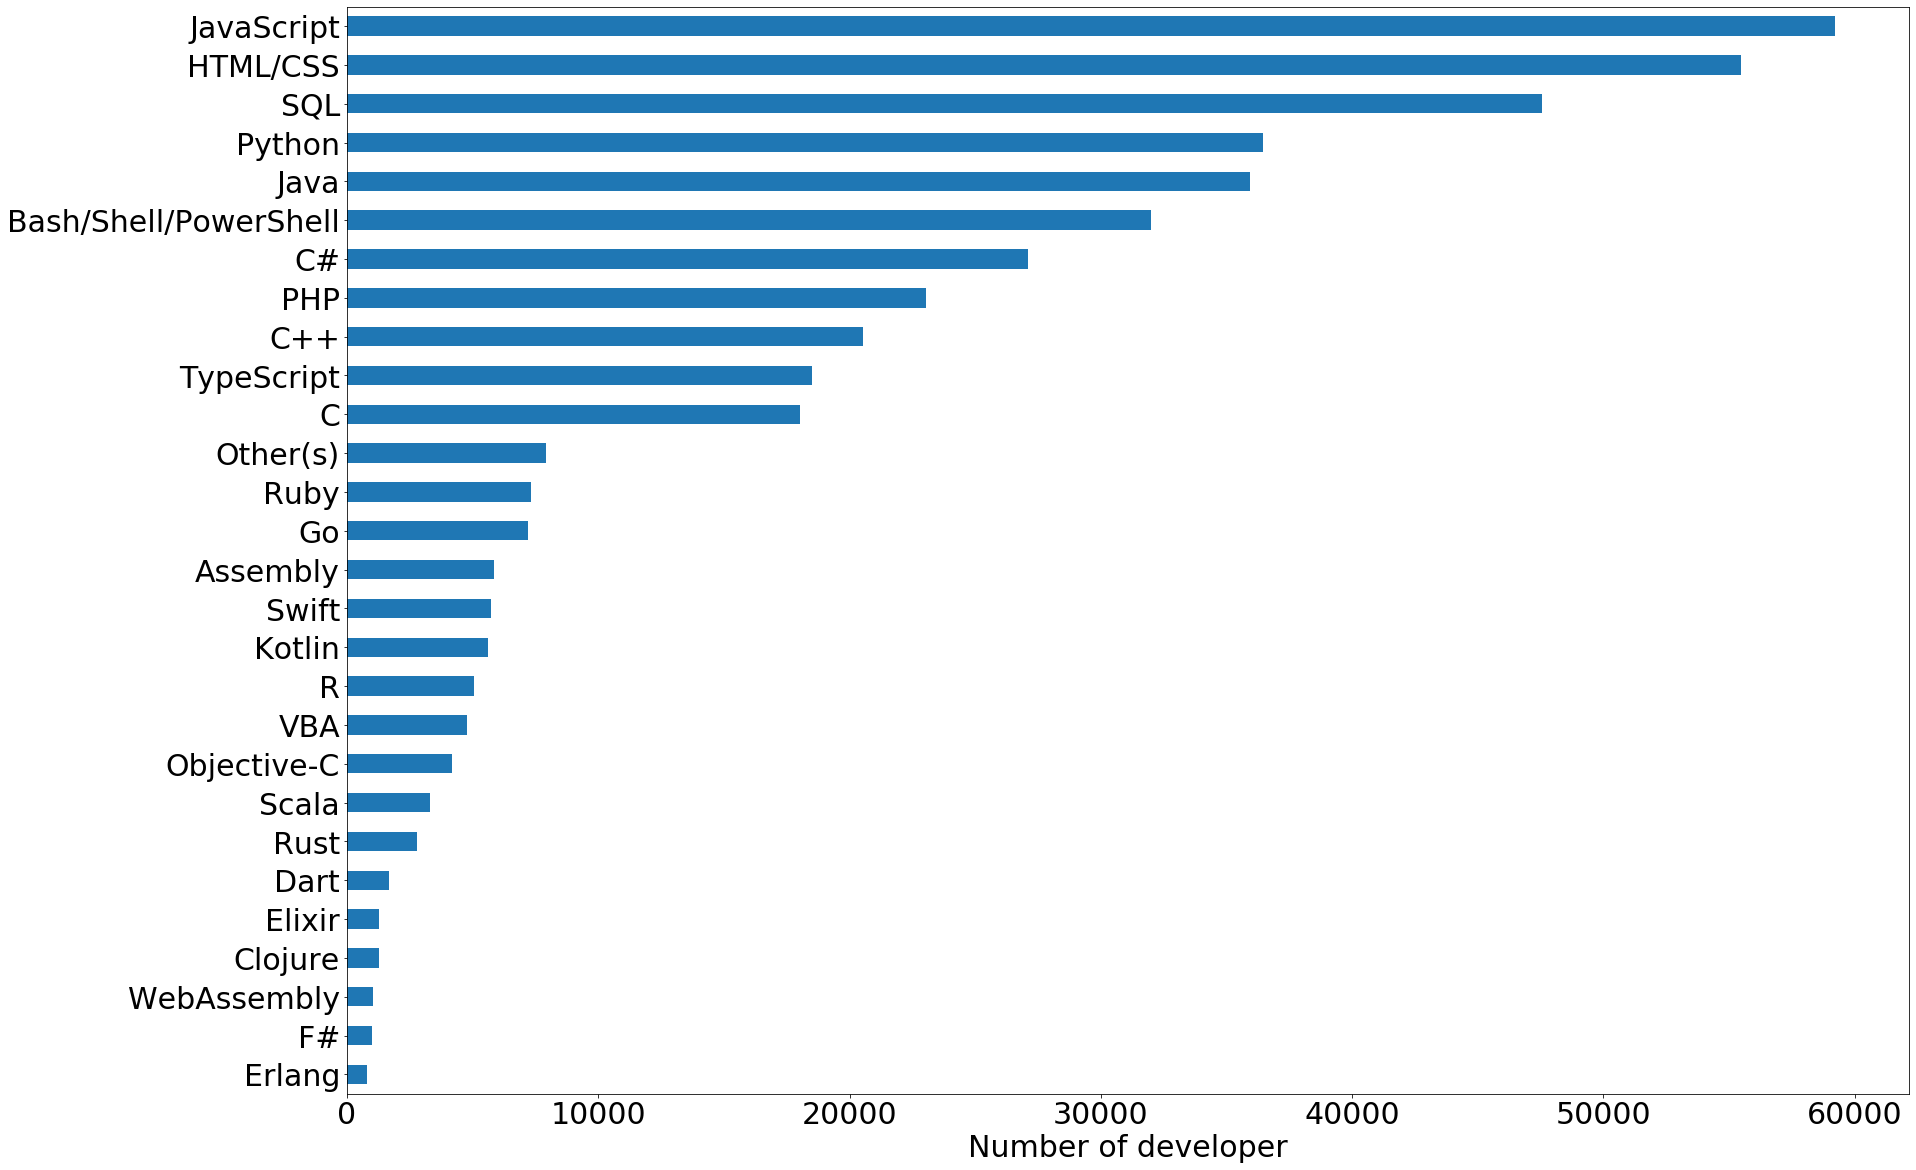

In [210]:
'''
Let's find out the most used languages by the developer's around the world.

'''

Plot_chart(df,'LanguageWorkedWith')

#### So, top 5 language of developer's choice are JavaScript, HTML/CSS, SQL, Python and Java. 
#### This is overall developer's choice. We can not say anything about DS and Ml for now. We need to dig out more data into.


#### Let's concentrate our analysis more specific to Data Science and Machine Learning specialist and how they choose to use Programming language?

In [20]:
# 'DevType field has developer type information and we will see how much missing values are there.

round((df.DevType.isnull().sum()/df.shape[0])*100,2)

8.49

##### So, only 8 % data is missing that can be ignored.

In [21]:
df_DevType=df[df.DevType.notnull()]
df_DevType.shape

(81335, 85)

#### We have filtered out the dataframe which has no 'DevType' missing values. It has 81335 records. Also, we will create a new field 'Is_DS' and store True if the respondent said "Data scientist or machine learning specialist" as their dev type.

In [152]:
df_DevType['Is_DS'] = df.DevType.str.contains("Data scientist or machine learning specialist");
df_DevType[df_DevType['Is_DS']].shape

(6460, 86)

#### So, there are only 6460 respondent says they are Data Sientist or Machine learning specialist. Let's find out what the practice as Programming Language:

In [157]:
df_DS=df_DevType[df_DevType['Is_DS']]   # Creating Data Scientist dataframe

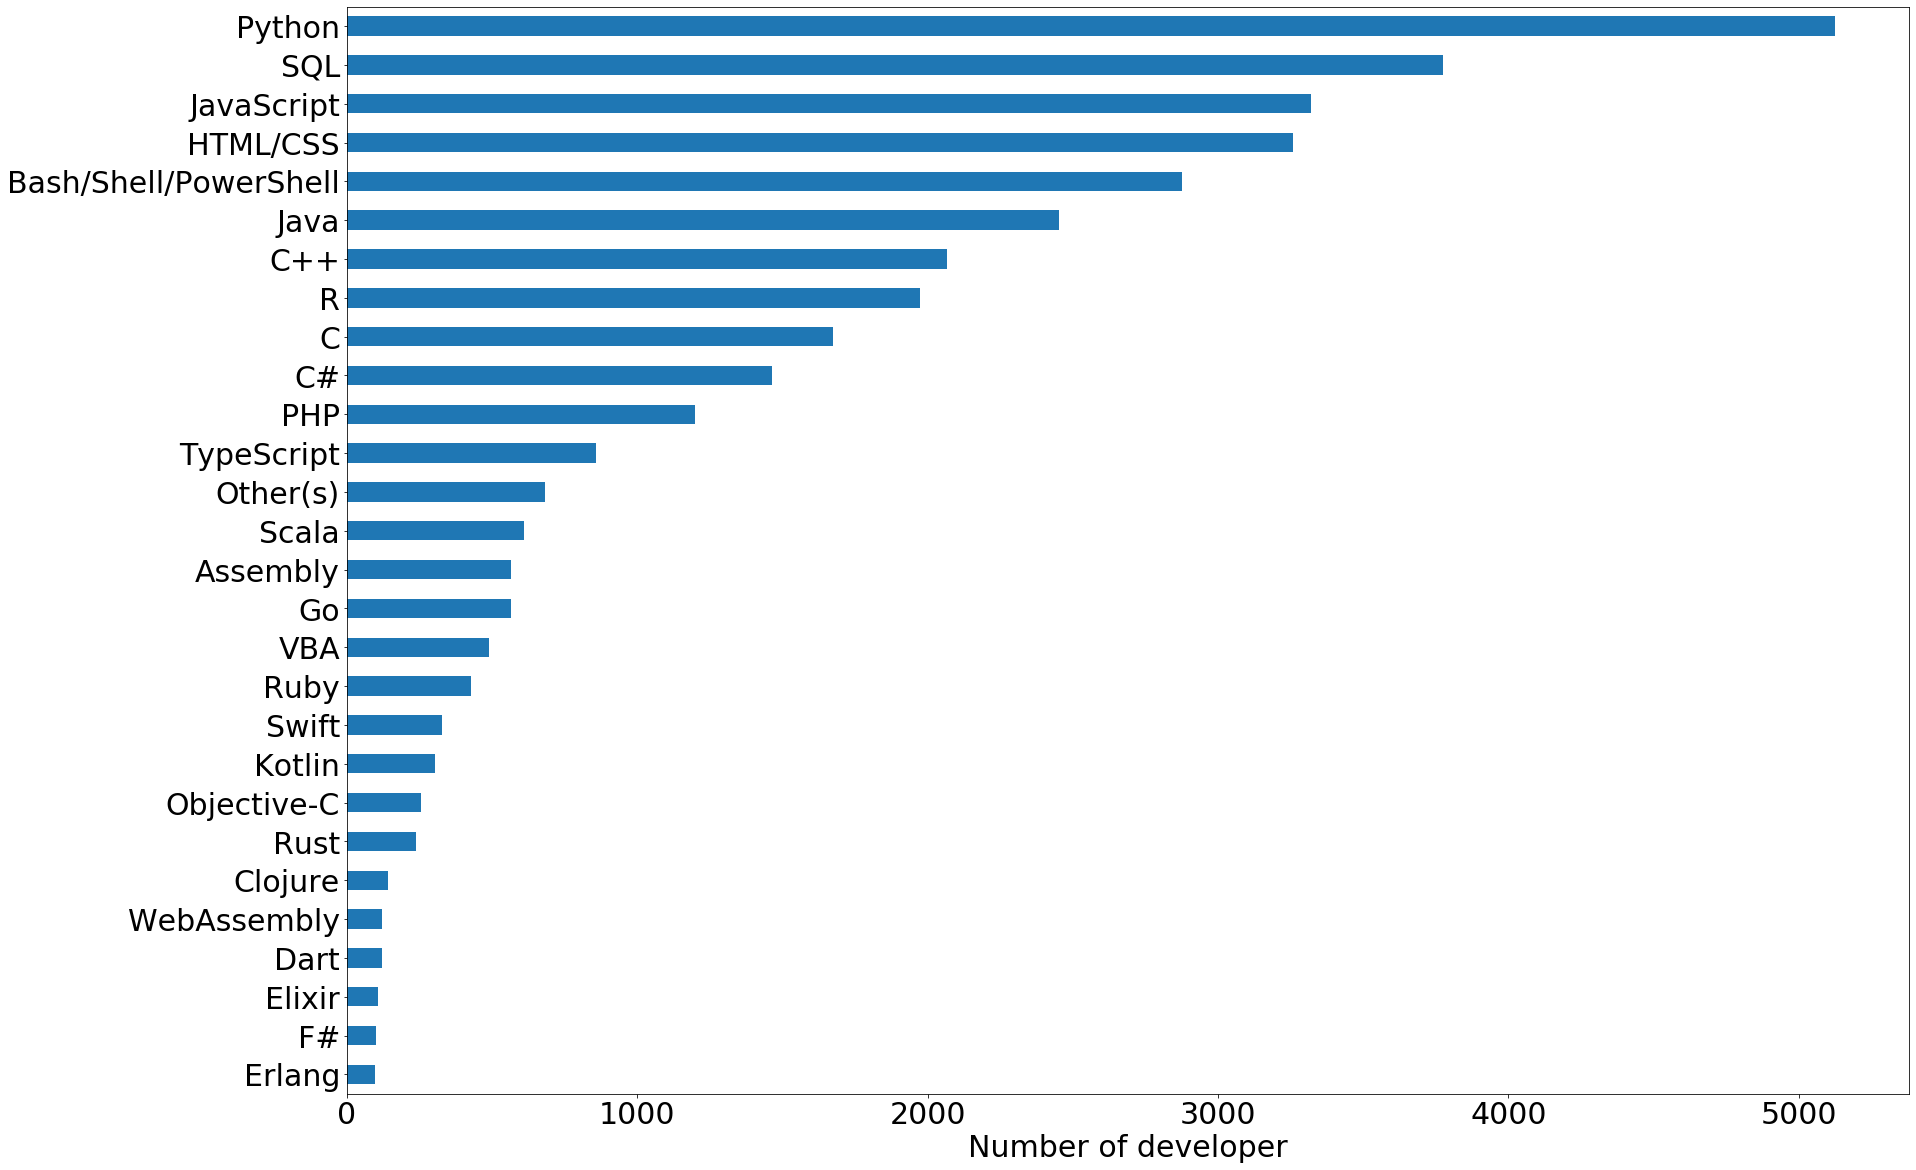

In [204]:
Plot_chart(df_DS,'LanguageWorkedWith')

### Conclusion:

Almost 80% of DS or ML developers preffered python. Python is by far the language of choice for developers who identify as Data scientist or ML specialist. For those desiring to enter the data science or machine learning landscape, learning python is definitely a good investment. 30% of the DS or ML developer's are using R.

It also answer the hottest question for Data Science community i.e., which language to learn python/R?

---

---
## 2. Which is the most used framework today?

---
Every student who wish to start career as developer have common question in mind i..e, Which is the best framework I should learn for the future. There are so many in the market so it is ovious that choosing one of them is quite tough. So, best possible answer could be to ask this question to the the developer itself and find out the most frequently use framework of their choice.

First we will see overall developer choice of framework and then to our objective we will find out the most preferable framework for the "Data scientist or ML specialist".

In [31]:
# Let's find out the column describing framework used
schema[schema['Column']=='WebFrameWorkedWith'].QuestionText

49    Which of the following web frameworks have you...
Name: QuestionText, dtype: object

In [32]:
# Let's see missing count
df['WebFrameWorkedWith'].isna().sum()/df.shape[0]

0.268454035079824

So, 26 % developer didnot old what they are using as web framework while working. Never the less, 74% have a say about so it is quite a good number to get quite a fair bit of idea about developer's choice of web framework.

In [33]:
df.WebFrameWorkedWith.value_counts().head()

jQuery            4171
ASP.NET;jQuery    2963
ASP.NET           2921
React.js          2353
Spring            2224
Name: WebFrameWorkedWith, dtype: int64

So, developer have given multiple option as well for their framework choice. We need to find unique count of each of the framework in the use today.

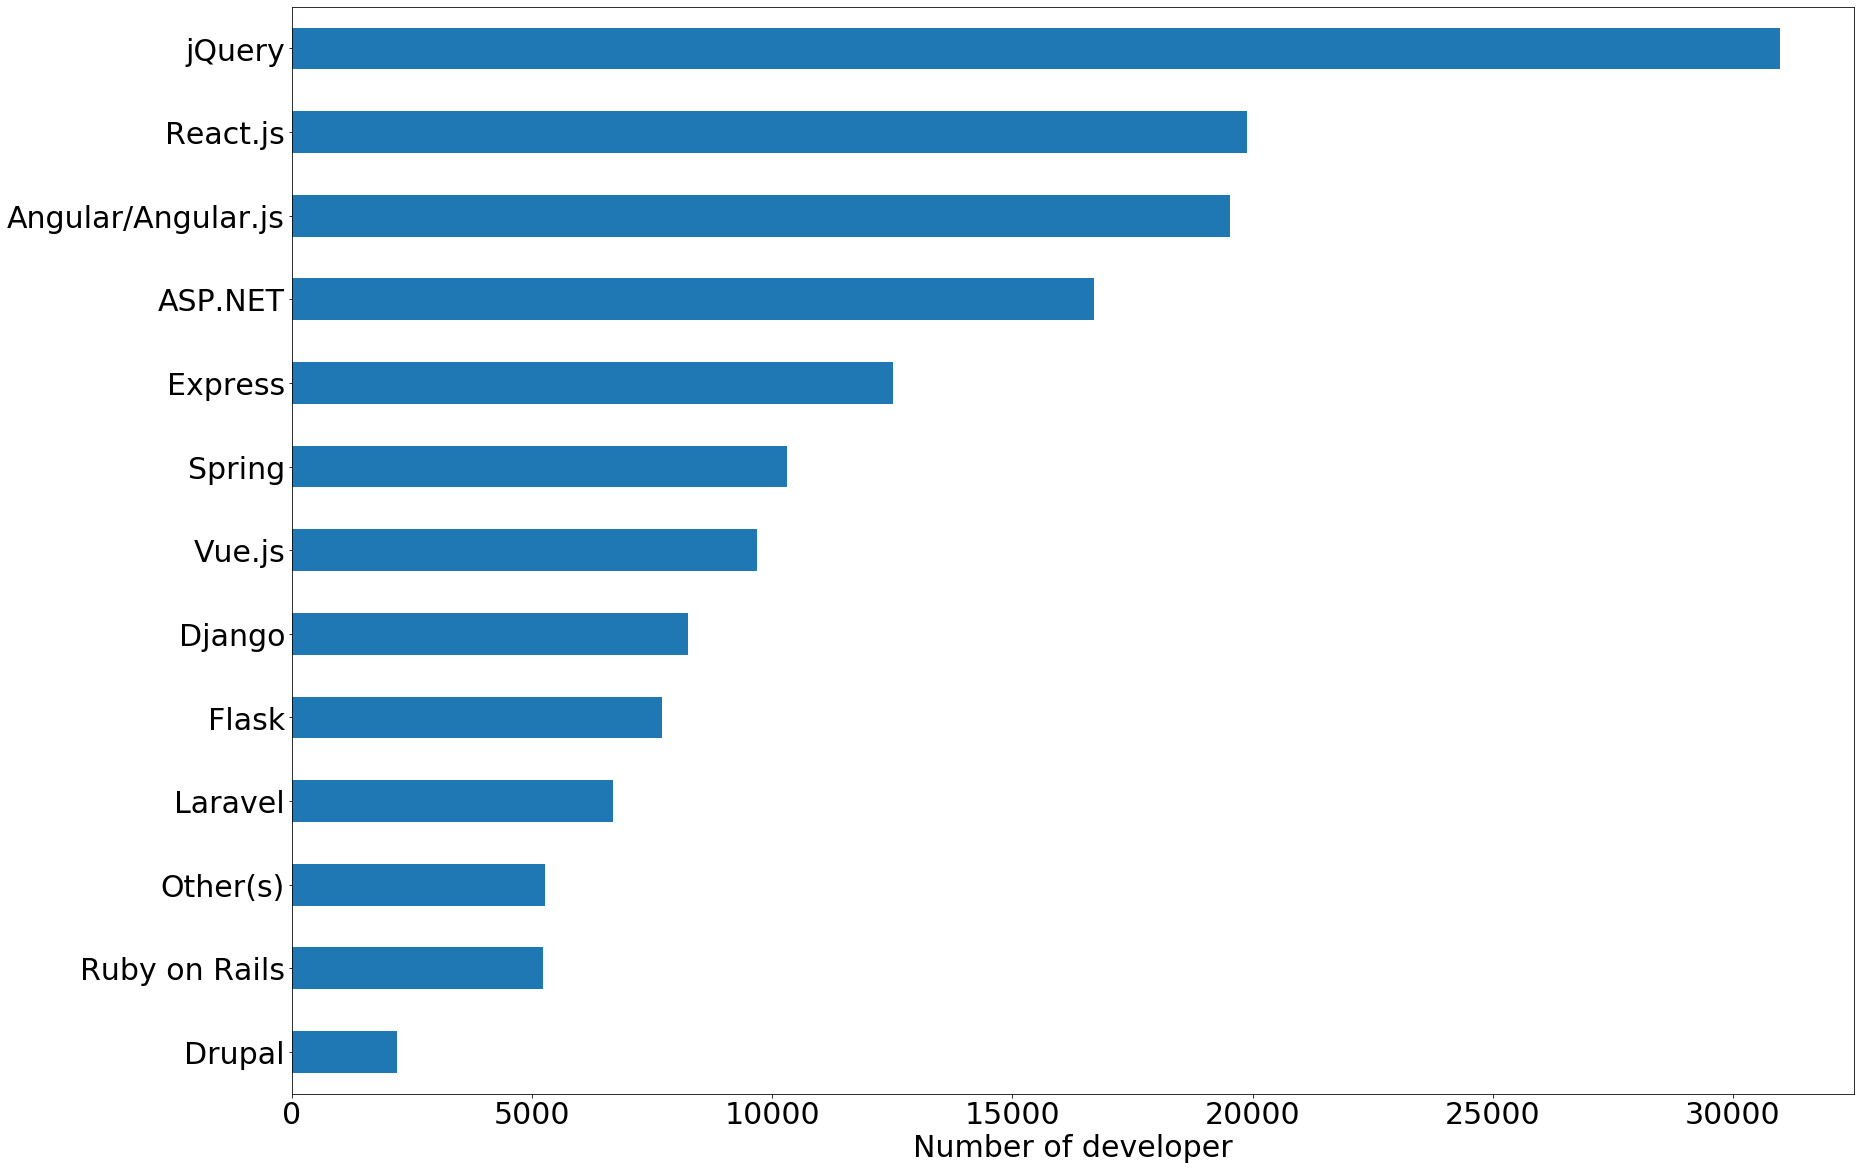

In [205]:
'''
Let's visually find out the most used framework today by the developer's around the world.
'''

Plot_chart(df,'WebFrameWorkedWith')

#### So, top 5 framework of developer's choice are jQuery, React.js, Angular/Angular.js, ASP.NET, and Express.    
---
#### This is overall developer's choice. We can not say anything about DS and Ml specialist for now. We need to dig out more data into.Let's concentrate our analysis more specific to Data Science and Machine Learning specialist and how they choose to use Programming language?
---

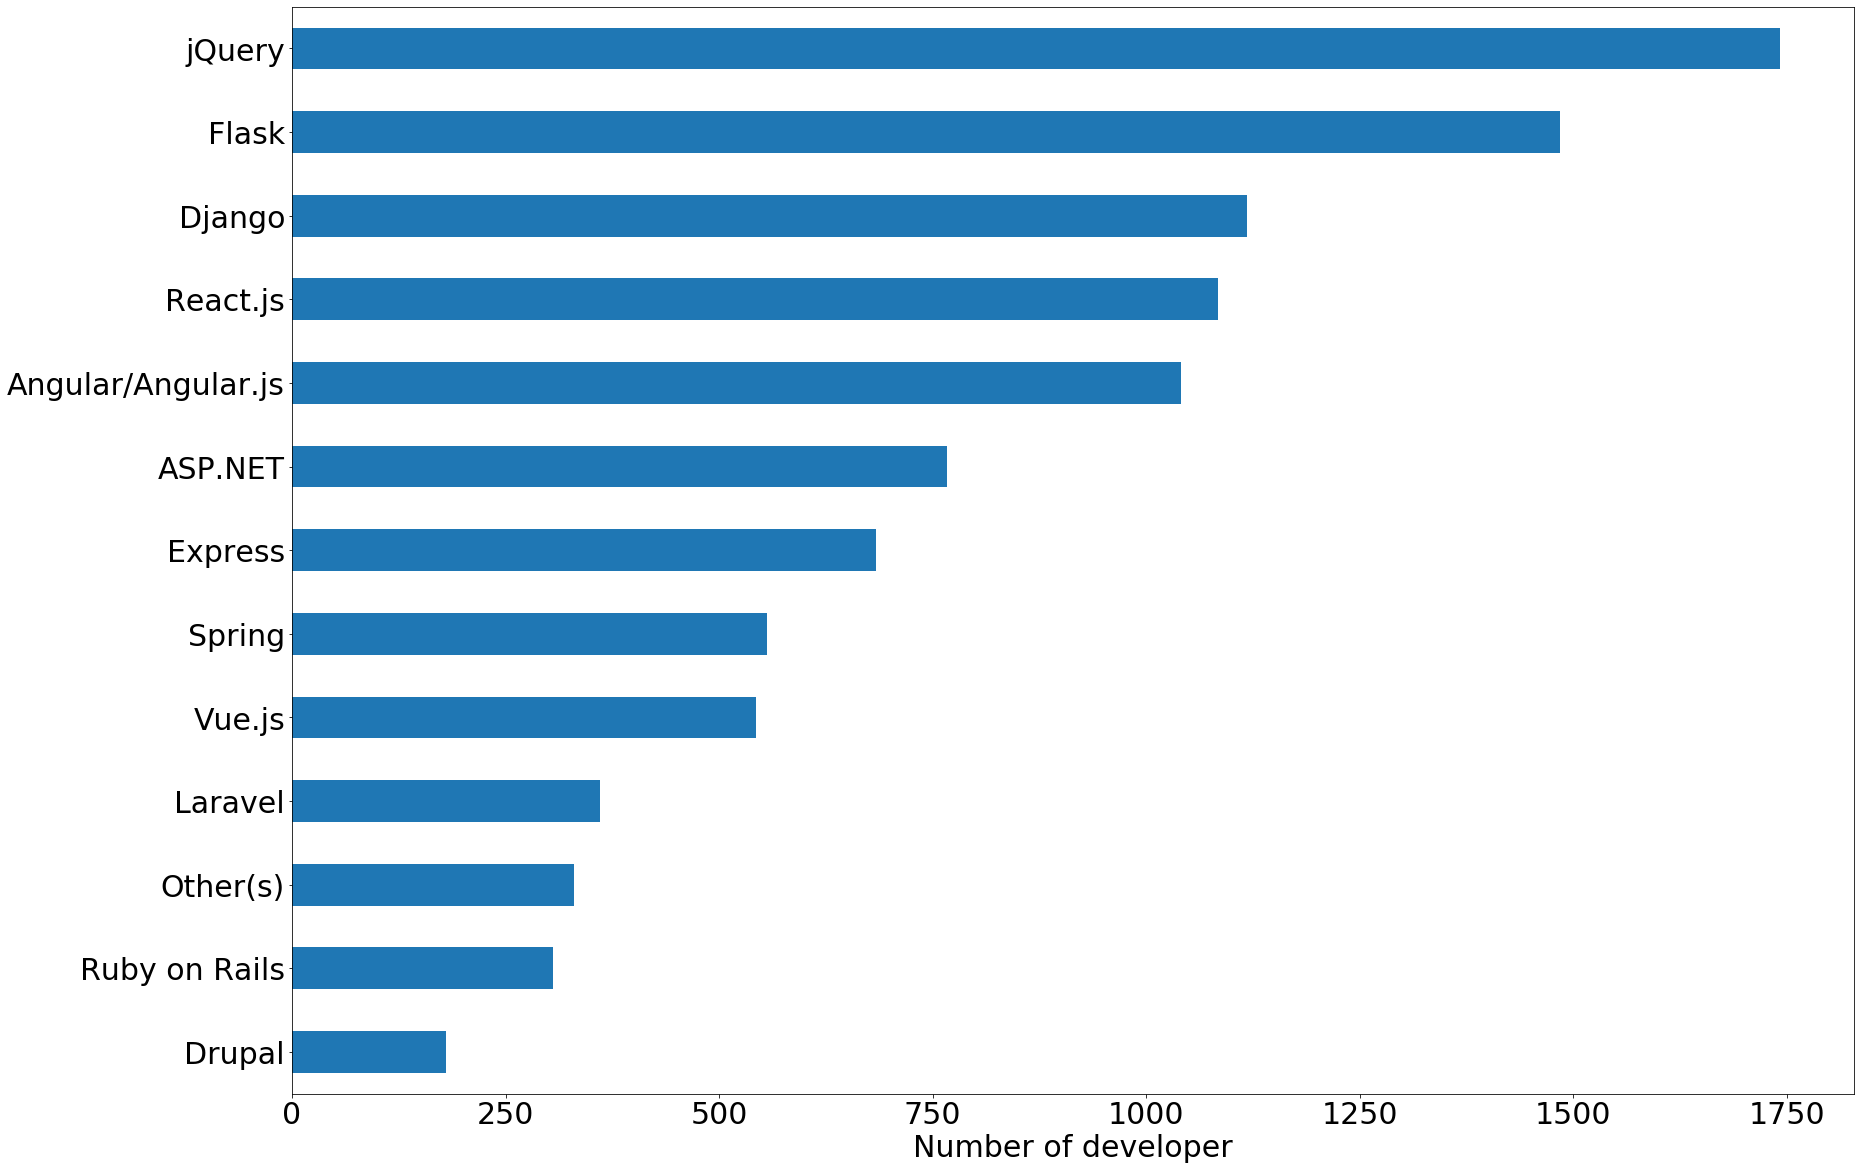

In [206]:
'''
Let's visually find out the most used framework today by the Ds or ML specialist around the world.
'''
Plot_chart(df_DS,'WebFrameWorkedWith')

### Conclusion:
---
jQuery, Flask, and Django are the most frequently used framework by the developers who identify themselves as Data scientist or ML specialist. For those aspiring to enter the data science or machine learning landscape, learning JQuery, Flask, Django are definitely a good investment.

27% of DS or ML specialist are using JQuery which is prefered framework for them. But Flask is also not far behind with 23% DS or ML specialist choice.

---

## 3. what are the tools data scientists use ?

Our agendaa is to find which is the most used tool for doing data science today so that any aspiring data scientist get to know what exactly the have to follow.

---

In [104]:
df.Country.nunique()

179

#### "MiscTechWorkedWith" is the field that has rlated information we are trying to dig out.

In [114]:
df.MiscTechWorkedWith.value_counts().head()

Node.js                   10571
.NET                       5006
.NET;.NET Core             4513
.NET;.NET Core;Node.js     2291
Pandas                     1696
Name: MiscTechWorkedWith, dtype: int64

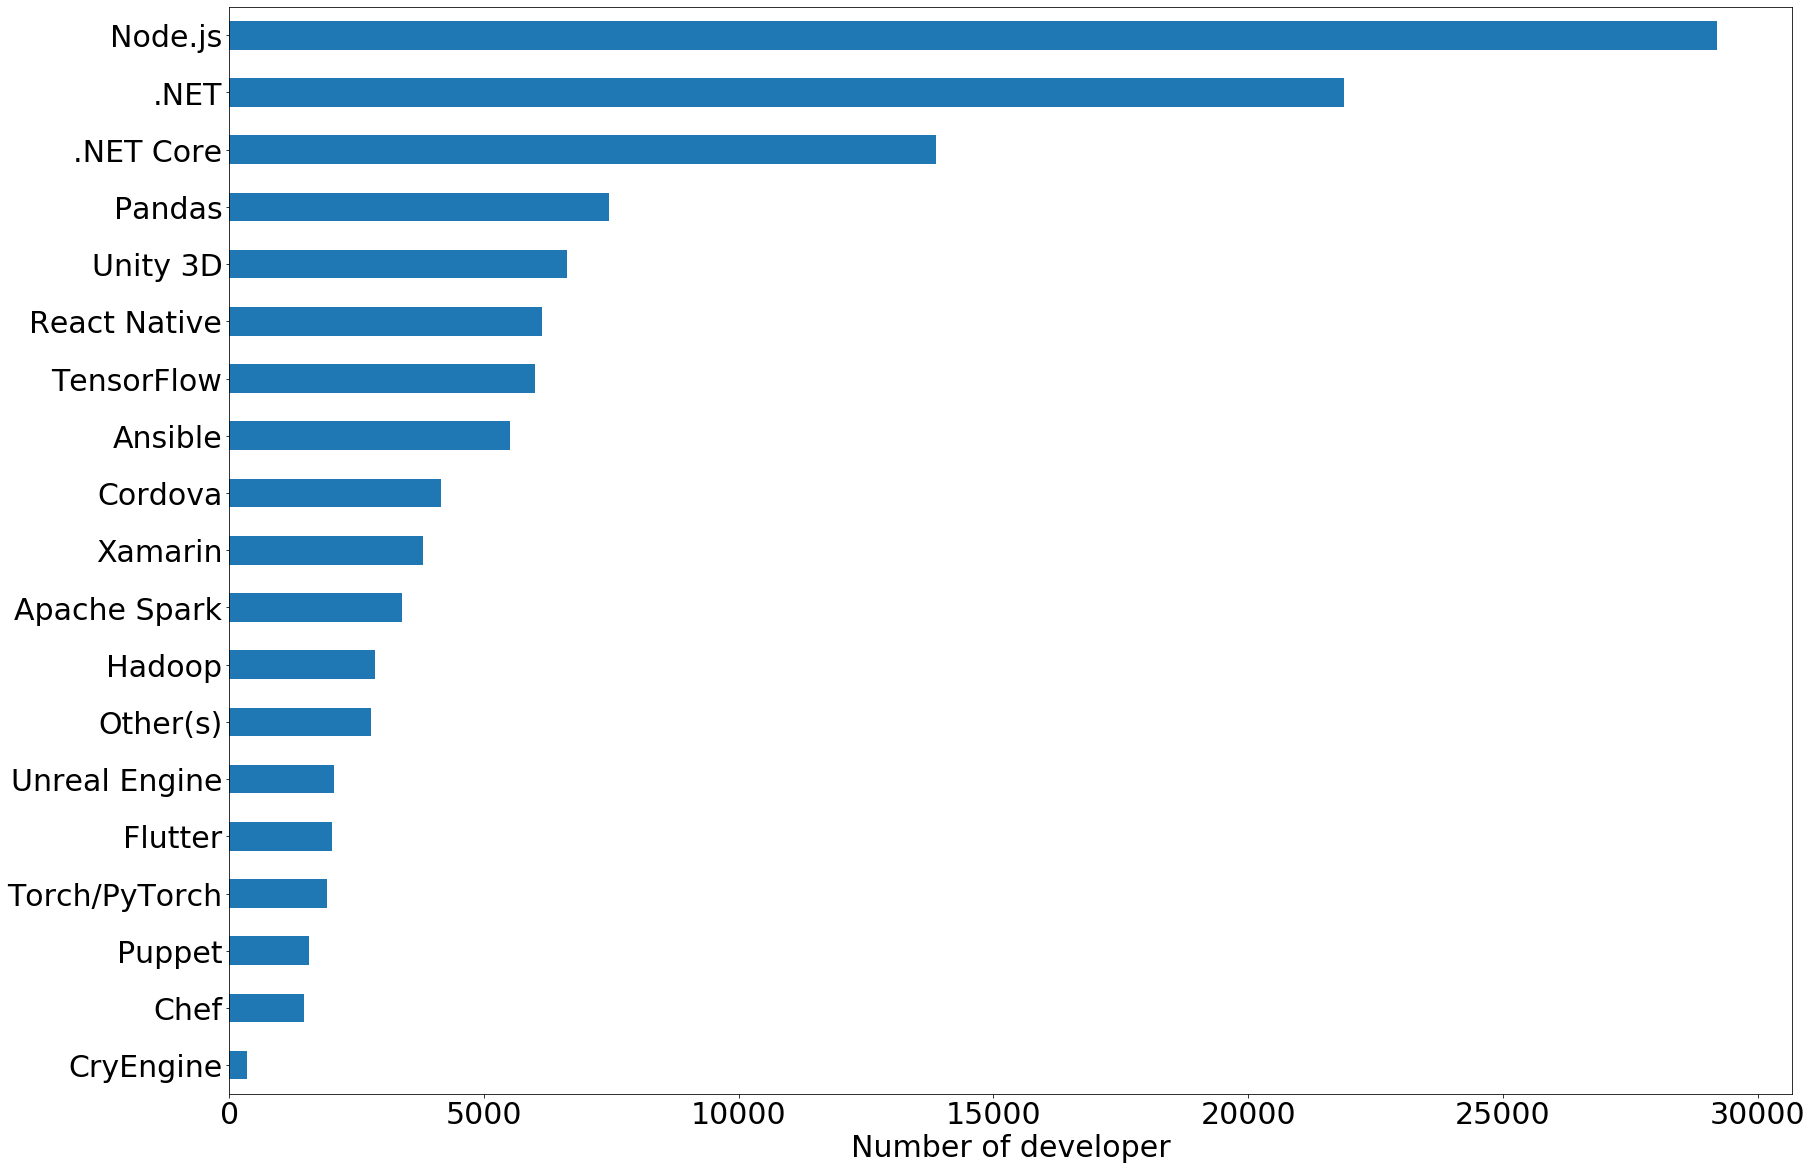

In [207]:
'''
Let's see what are the most used tools by the overall all developer's around the world.
'''

Plot_chart(df,'MiscTechWorkedWith')

#### So, cllearly Node.js, .Net, Pandas are top most tools used by the developers around the world.

---

####  Now time to see what are the tools data scientists are using at most:

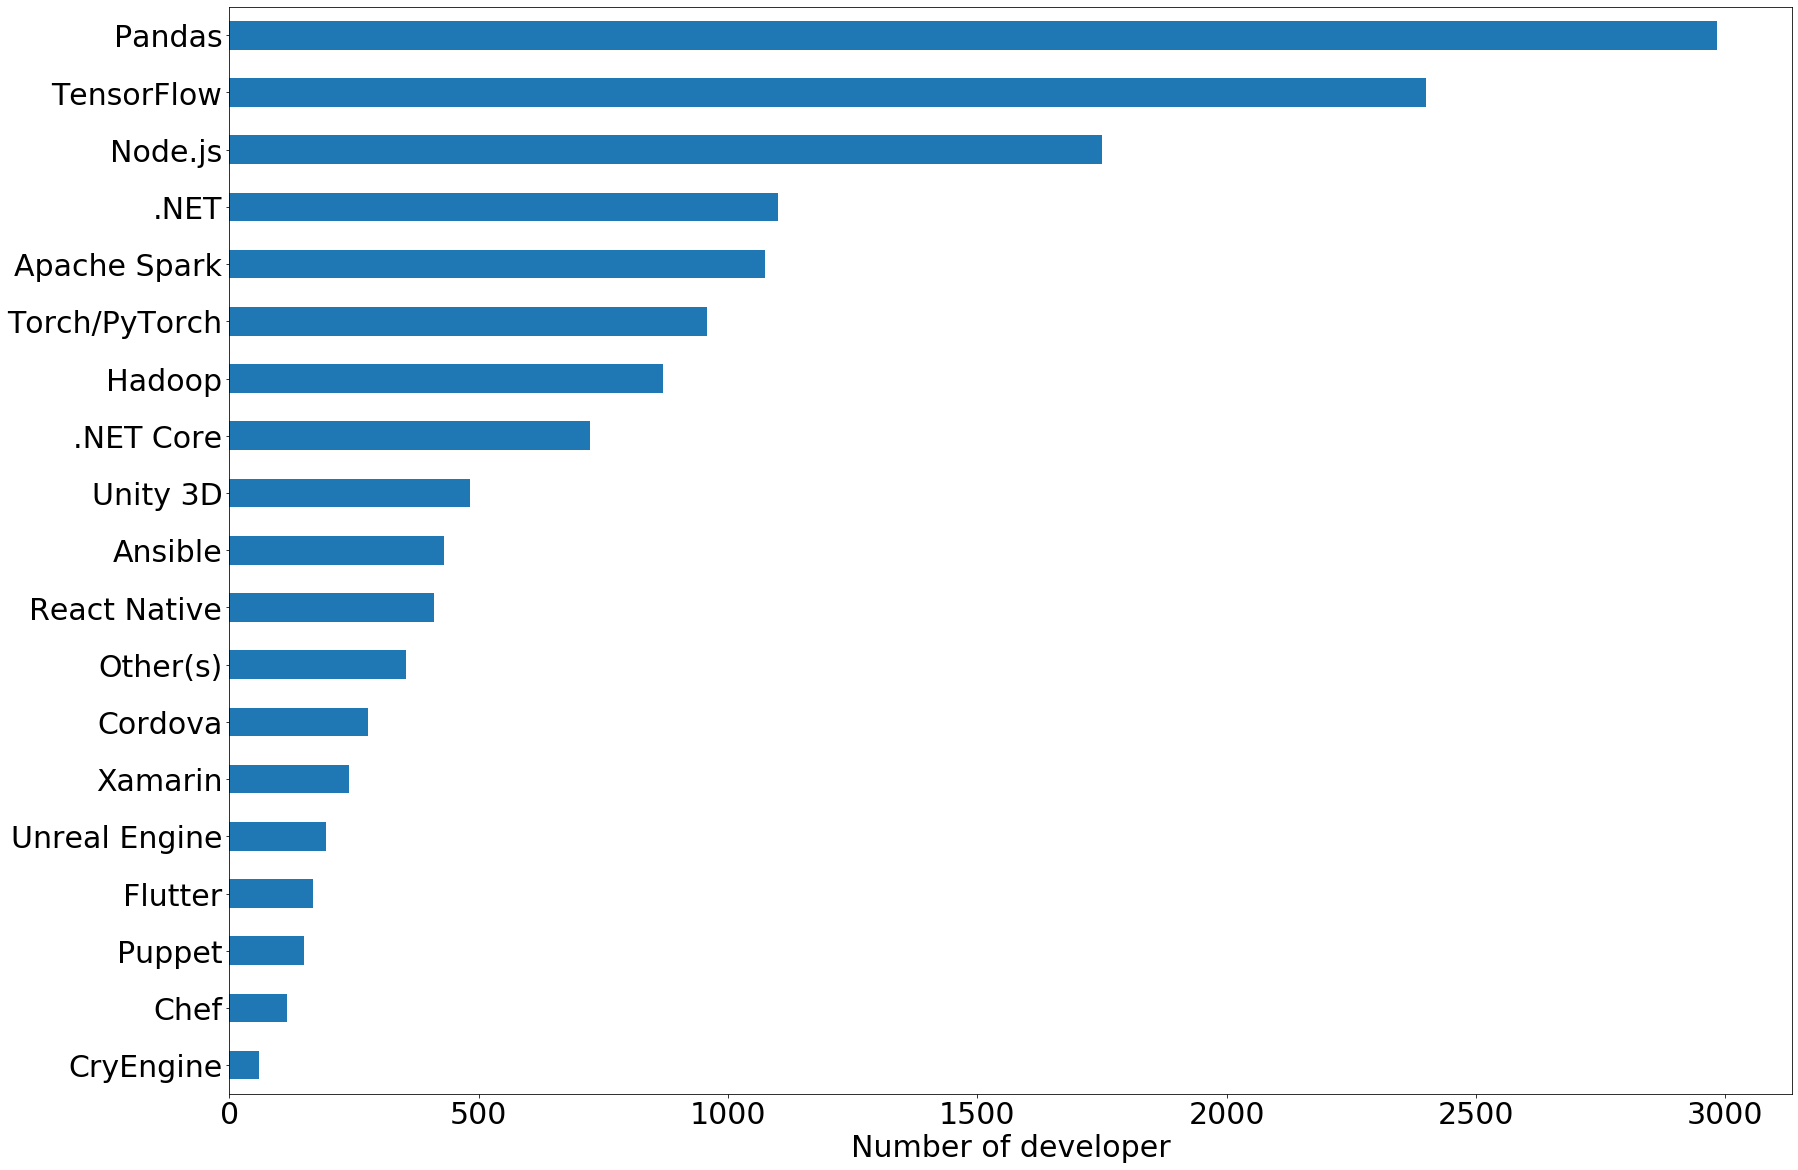

In [208]:
'''
Most used tools by the Data scientists and machine learning specialist.
'''

Plot_chart(df_DS,'MiscTechWorkedWith')

So, clearly we get to know whats are the tools most data science practisioner are using. 

### Conclusion:
---

Pandas and Tensorflow are the most used data science tool today. Pandas crealy win the race by quite a bit margin. Pandas is preferred by almost 47% of the data science professional as most used tool for data analysis. 

## 4. How about the chances of finding jobs when any non-developer moves to developing field?

---

Anybody who wish to become a developer or have fascination towards Data Science and Machine learning have one question in mind whether he/she would able to find jobs in real world scenario ? 
What %age of chances are there to break into any DS role?

We will focus our analysis in this section towards finding answer to above question:

In [232]:
# Let's find out the column describing at what age developer starts writing code

schema[schema['Column']=='Age1stCode'].QuestionText

14    At what age did you write your first line of c...
Name: QuestionText, dtype: object

In [235]:
round((df['Age1stCode'].isna().sum()/df.shape[0])*100,2)

1.41

Only 1.5 %age of missing data so can be ignored while analysis.

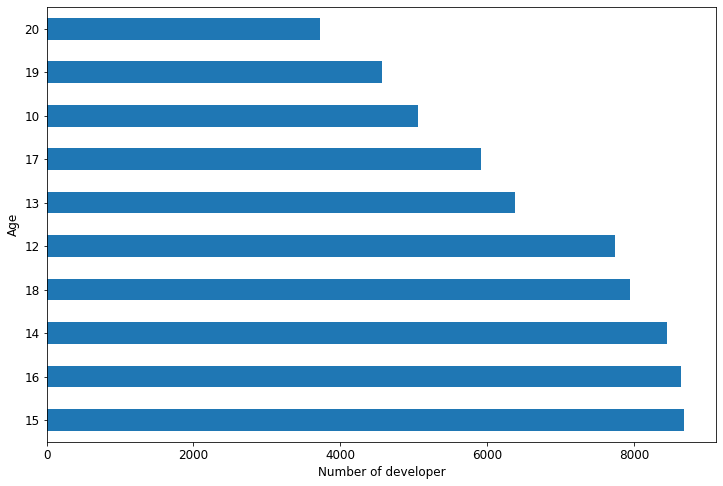

In [263]:
plt.figure(figsize = (12,8))
plt.xlabel('Number of developer',fontsize = 12)
plt.ylabel('Age',fontsize = 12)
df.Age1stCode.value_counts().sort_values(ascending=False).head(10).plot(kind='barh',fontsize = 12);


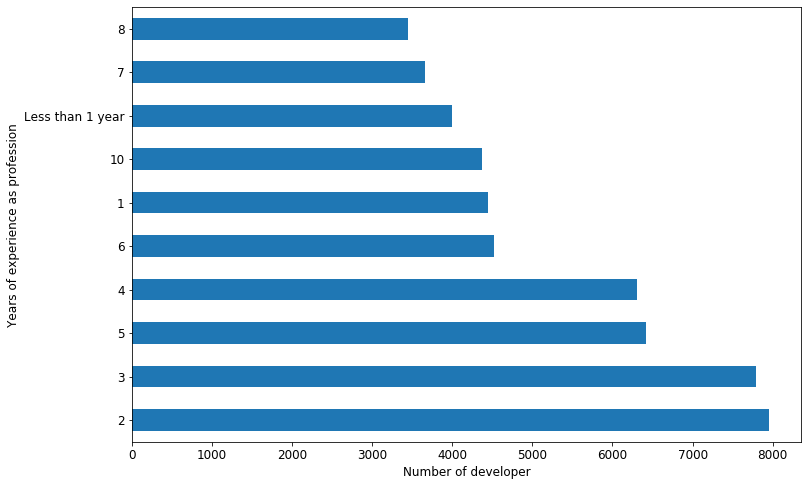

In [201]:
plt.figure(figsize = (12,8))
plt.xlabel('Number of developer',fontsize = 12)
plt.ylabel('Years of experience as profession',fontsize = 12)
df.YearsCodePro.value_counts().sort_values(ascending=False).head(10).plot(kind='barh',fontsize = 12);

### Conclusion:
Clearly, maximum number of data science professional are having 2 yrs' of experience and also most of them started coding at 15 yrs' of age. So, any time in your career you can start learning coding and there are very good chances of finding job as well as we can see even less than 1 year of experienced data science professionals are also there in good number.

## 5. Which countries has maximum "Data Scientist or Machine Learning specialist" today? 

---

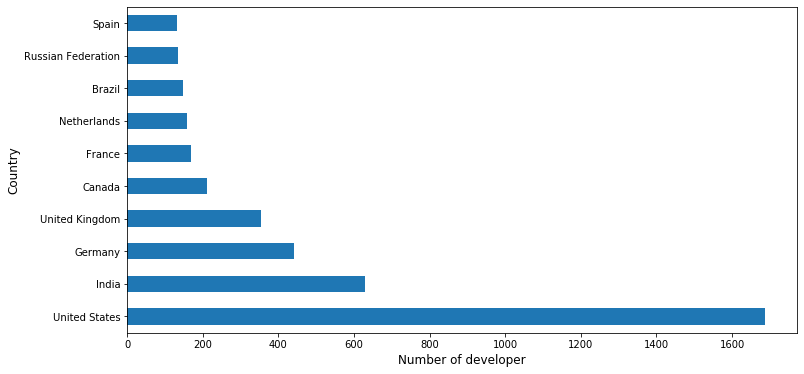

In [57]:
plt.figure(figsize = (12,6))
plt.xlabel('Number of developer',fontsize = 12)
plt.ylabel('Country',fontsize = 12)
df_DS.Country.value_counts().sort_values(ascending=False).head(10).plot(kind='Barh')
#sns.countplot(data=df_DS, x= 'Country');

Clearly US has maximum number of Data Scientist today followed by India and Germany. This insights led us to find what about the salary trends? 

In [59]:
# Let's see how many Data Scientist or ML specialist are there?

df_DS.shape[0]

6460

In [64]:
#  Let's see how many of them reported their salary

df_DS['CompTotal'].notnull().sum()

4230

In [67]:
Salaried_DS=df_DS[df_DS['CompTotal'].notnull()]

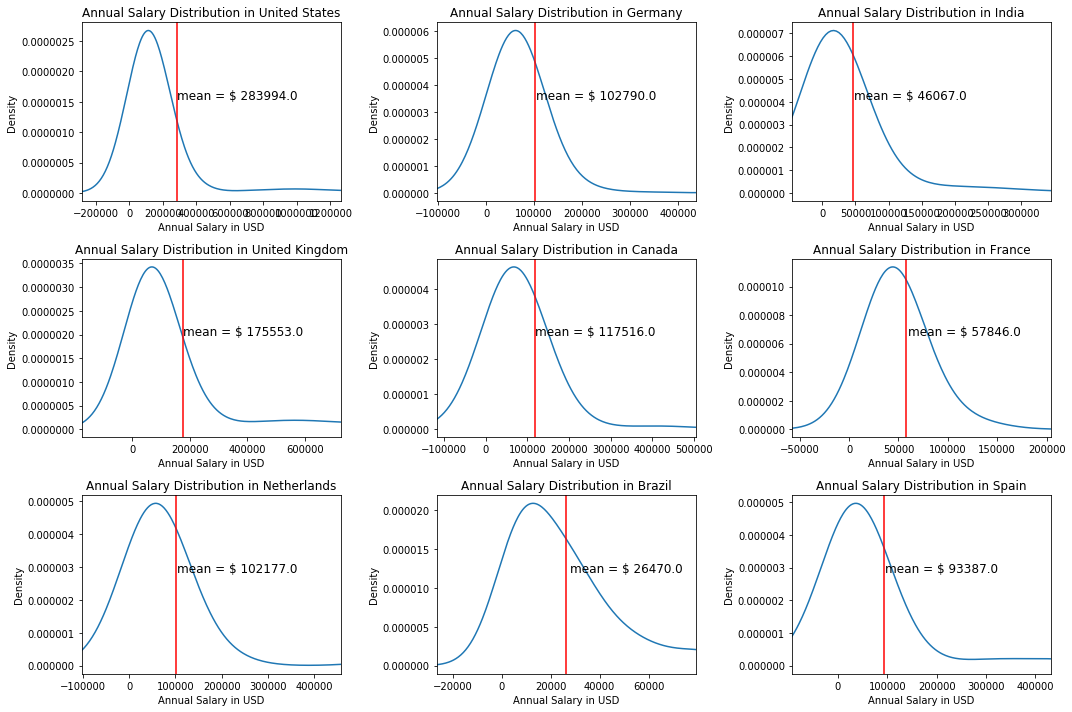

In [71]:
# now lets plot salary distributions for the top 10 countries

fig = plt.figure(figsize=(15,10))

countries = Salaried_DS['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = Salaried_DS.loc[Salaried_DS['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())
    
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.savefig('developer_salaries_by_country.png',bbox_inches = 'tight')
plt.show()

### So, Top three location for Data Scientist or Machine Learning specialist to do job are United State, Germany and India.

#### This gives a clear picture that since these three countries provides maximum compensation for "Data Scientist or Machine Learning specialist" job profile, these countries have higest number of "Data Scientist or Machine Learning specialist" developers as well.

#### That means high paying jobs encourage developer's to make career in that stream.